In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns



In [ ]:
# from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [14]:
df = pd.read_csv("rca.csv")

In [15]:
df.columns

Index(['trace_id', 'timestamp', 'latency', 'succ', 'source', 'target'], dtype='object')

In [ ]:
df.head(10)

In [16]:
detetor_name = 'KNN'
detector = KNN()
detector.fit(df.iloc[:,1:4])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
# train KNN detector
# clf_name = 'KNN'
# clf = KNN()
# clf.fit(df)

In [ ]:
# get the prediction labels and outlier scores of the training data
previsoes = detector.labels_ # outliers labels (0 or 1)
previsoes
np.unique(previsoes, return_counts=True)
confianca_previsoes = detector.decision_scores_ # raw outliers scores
confianca_previsoes

In [ ]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(detetor_name, previsoes, confianca_previsoes)

In [ ]:
# Visualize the outliers
# visualize(detetor_name, previsoes, show_figure=True, save_figure=False)

In [ ]:
outliers = []
for i in range(len(previsoes)):
    print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [ ]:
print(outliers)

In [ ]:
lista_outliers = df.iloc[outliers,:]
lista_outliers

<AxesSubplot:xlabel='latency', ylabel='succ'>

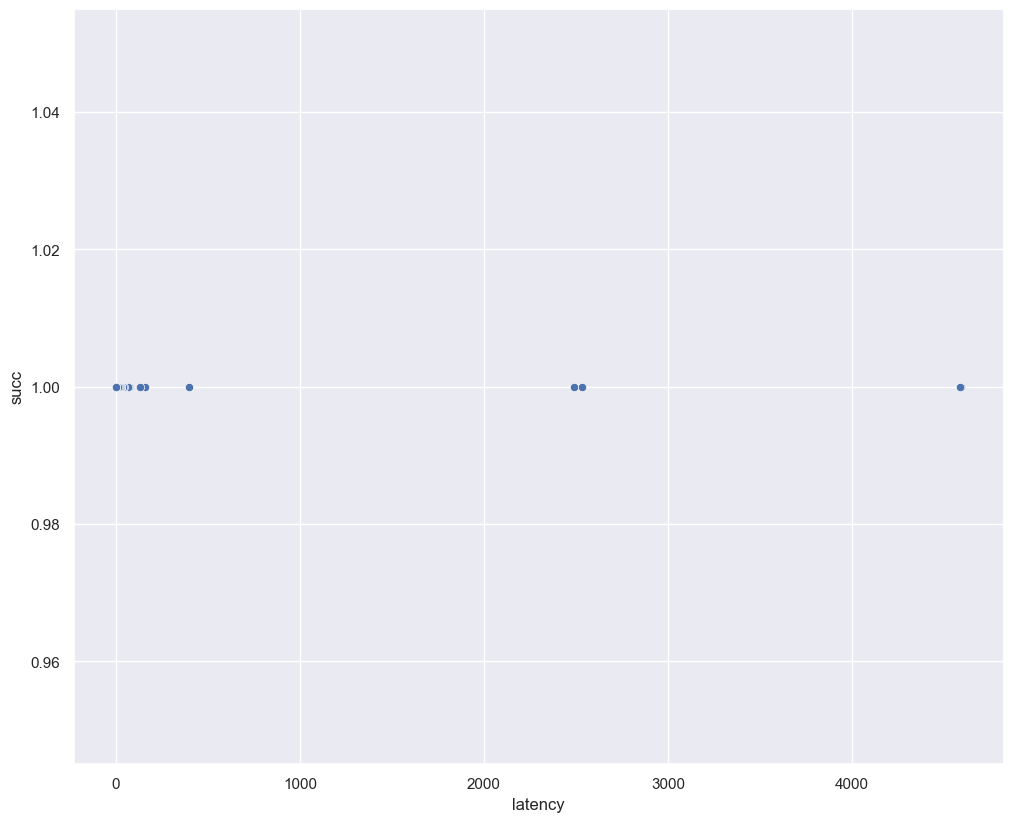

In [13]:
plt.figure(figsize=(12,10),dpi=100)
#sns.heatmap(df.corr())
sns.set_theme(style='darkgrid')
sns.scatterplot(data=df, x='latency', y='succ')